# Heart Disease Classification based on various features like cholesterol,Resting Blood Sugar, Angina etc, This analysis is based on Logistic Regression 

# Dataset used here is from dataset from UCI Machine Learning Repository

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:

import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix

In [6]:
warnings.filterwarnings('ignore')

In [7]:
df_cl=pd.read_csv("/Users/abhaypratapsingh/Downloads/disease_dataset/processed.cleveland.data")
df_cl.columns=['age',   'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']


In [8]:
df_cl.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [9]:
df_hun=pd.read_csv("/Users/abhaypratapsingh/Downloads/disease_dataset/processed.hungarian.data")
df_hun.columns=['age',   'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [10]:
df_hun.shape

(293, 14)

In [11]:
df_swiss=pd.read_csv("/Users/abhaypratapsingh/Downloads/disease_dataset/processed.switzerland.data")
df_swiss.columns=['age',   'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [12]:
df_va=pd.read_csv("/Users/abhaypratapsingh/Downloads/disease_dataset/processed.va.data")
df_va.columns=['age',   'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [13]:
df_va.shape


(199, 14)

In [14]:
df_merge=[df_cl,df_hun,df_swiss,df_va]

In [15]:
df=pd.concat(df_merge,axis=0)

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [17]:
df.describe()

,age,sex,cp,num
count,916.000000,916.00000,916.000000,916.000000
mean,53.541485,0.78821,3.255459,0.996725
std,9.370073,0.40880,0.925783,1.143760
min,29.000000,0.00000,1.000000,0.000000
25%,47.000000,1.00000,3.000000,0.000000
50%,54.000000,1.00000,4.000000,1.000000
75%,60.000000,1.00000,4.000000,2.000000
max,77.000000,1.00000,4.000000,4.000000


In [18]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns

In [19]:
print(numerical_columns)

Index(['age', 'sex', 'cp', 'num'], dtype='object')


In [20]:
object_columns=df.select_dtypes(include=['object']).columns

In [21]:
print(object_columns)

Index(['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')


In [22]:
def Classify_Features(df):
    categorical_features=[]
    noncategorical_features=[]
    continuous_features=[]
    discrete_features=[]

    for column in df.columns:
        if df[column].dtype=='object':
            if df[column].nunique() < 10:
                
                categorical_features.append(column)
            else:
               

                noncategorical_features.append(column)

        elif df[column].dtype in ['int64','float64','float32','int32']:
            
            if df[column].nunique() < 10:
                discrete_features.append(column)

            else:
                continuous_features.append(column)


    return categorical_features,noncategorical_features,discrete_features,continuous_features  

In [23]:
categorical,noncategorical,discrete,continuous=Classify_Features(df)

In [24]:
for i in continuous:
    print(i)

age


In [25]:
for i in categorical:
    print(i)

fbs
restecg
exang
slope
ca
thal


In [26]:
for i in noncategorical:
    print(i)

trestbps
chol
thalach
oldpeak


In [27]:
for i in discrete:
    print(i)

sex
cp
num


# Detailed Explanation of Every Column
# cp 
# 	•	0: Typical Angina
# 	•	1: Atypical Angina
# 	•	2: Non-anginal Pain
# 	•	3: Asymptomatic |

# trestbps | Resting Blood Pressure | 94-200 mm Hg | Indicates potential hypertension risk |
# | chol | Serum Cholesterol | 126-564 mg/dl | Higher levels suggest increased heart disease risk |
# | fbs | Fasting Blood Sugar | 0-1 | 1 = >120 mg/dl, indicates diabetes risk |
# | restecg | Resting ECG Results | 0-2 |
# 	•	0: Normal
# 	•	1: ST-T Wave Abnormality
# 	•	2: Left Ventricular Hypertrophy |
# | thalach | Maximum Heart Rate | 71-202 bpm | Indicates cardiovascular fitness |
# | exang | Exercise-Induced Angina | 0-1 | 1 = Chest pain during exercise |
# | oldpeak | ST Depression | 0-6.2 | Indicates heart stress during exercise |
# | slope | ST Segment Slope | 1-3 |
# 	•	1: Upsloping
# 	•	2: Flat
# 	•	3: Downsloping |
# | ca | Major Vessels | 0-3 | Number of major vessels colored by fluoroscopy |
# | thal | Thalassemia | 3, 6, 7 | Indicates heart muscle blood flow |

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


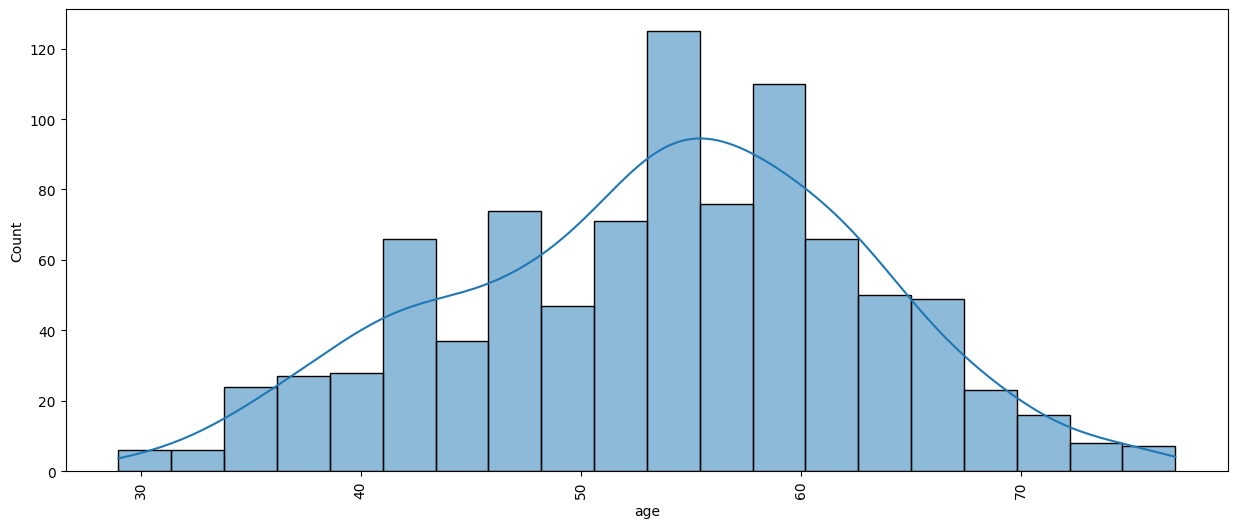

In [29]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i],bins=20,kde=True,palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn.metrics import classification_report,accuracy_score

In [33]:
X=df.drop('num',axis=1)

In [34]:
X.shape

(916, 13)

In [80]:
Y=df
Y=Y.drop(['age','sex',   'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'],axis=1)

In [83]:
Y.dtypes

num    int64
dtype: object

In [37]:
#X['trestbps'] = X['trestbps'].str.replace('\?', '', regex=True)
#X['sex'] = X['sex'].str.replace('\?', '', regex=True)
X['trestbps'] = X['trestbps'].str.replace('\?', '', regex=True)
X['chol'] = X['chol'].str.replace('\?', '', regex=True)
X['fbs'] = X['fbs'].str.replace('\?', '', regex=True)
X['restecg'] = X['restecg'].str.replace('\?', '', regex=True)
X['thalach'] = X['thalach'].str.replace('\?', '', regex=True)
X['exang'] = X['exang'].str.replace('\?', '', regex=True)
X['oldpeak'] = X['oldpeak'].str.replace('\?', '', regex=True)
X['slope'] = X['slope'].str.replace('\?', '', regex=True)

In [45]:
X.shape

(916, 13)

In [39]:
for column in X.columns:
    print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


In [44]:
for column in X.columns:
    if X[column].dtype=='object':
        
        X[column] = X[column].replace('?', np.nan)
        X[column] = X[column].astype(float)
        # Convert column to string
        X[column] = X[column].astype(float)

In [46]:
X.shape

(916, 13)

In [47]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object

In [84]:
Y

,num
0,2
1,1
2,0
3,0
4,0
...,...
194,1
195,0
196,2
197,0


In [53]:
X = X.fillna(X.mean()) ##Replace Missing values with mean

In [57]:
Y=df
Y=Y.drop(['age','sex',   'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'],axis=1)

In [57]:
Y=df
Y=Y.drop(['age','sex',   'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'],axis=1)

In [67]:
Y.shape

(916,)

In [93]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [94]:
Y_train

,num
25,0
84,0
10,0
80,2
149,0
...,...
106,1
270,0
143,0
133,0


In [95]:
model=LogisticRegression()

In [96]:
model.fit(X_train,Y_train)

LogisticRegression()

In [78]:
print(X_train)

      age  sex   cp    trestbps        chol       fbs   restecg     thalach  \
25   58.0  0.0  3.0  132.430631  220.965368  0.177143  0.256659  130.987478   
84   44.0  1.0  3.0  132.430631  220.965368  0.177143  0.256659  130.987478   
10   56.0  0.0  2.0  132.430631  220.965368  0.177143  0.256659  130.987478   
80   61.0  1.0  4.0  146.000000  241.000000  0.000000  0.256659  148.000000   
149  54.0  1.0  2.0  120.000000  246.000000  0.000000  0.000000  110.000000   
..    ...  ...  ...         ...         ...       ...       ...         ...   
106  57.0  1.0  3.0  132.430631  220.965368  0.177143  0.256659  130.987478   
270  66.0  1.0  4.0  132.430631  220.965368  0.177143  0.256659  130.987478   
143  54.0  1.0  3.0  132.430631  203.000000  0.000000  0.256659  130.987478   
133  53.0  1.0  2.0  120.000000  220.965368  0.000000  0.000000  132.000000   
102  71.0  0.0  3.0  132.430631  220.965368  0.177143  0.256659  130.987478   

        exang   oldpeak     slope        ca     tha

In [74]:
print(Y_train)

      age  sex   cp    trestbps        chol       fbs   restecg     thalach  \
225  38.0  1.0  4.0  110.000000  220.965368  0.000000  0.000000  150.000000   
113  68.0  1.0  4.0  135.000000  220.965368  0.000000  1.000000  120.000000   
198  62.0  1.0  2.0  120.000000  254.000000  0.000000  0.256659   93.000000   
145  57.0  1.0  4.0  132.430631  220.965368  0.177143  0.256659  130.987478   
166  69.0  1.0  3.0  132.430631  271.000000  0.000000  0.256659  130.987478   
..    ...  ...  ...         ...         ...       ...       ...         ...   
60   46.0  0.0  3.0  132.430631  220.965368  0.177143  0.256659  130.987478   
268  55.0  1.0  2.0  160.000000  292.000000  1.000000  0.000000  143.000000   
89   61.0  1.0  4.0  150.000000  220.965368  0.000000  0.000000  117.000000   
64   57.0  1.0  4.0  140.000000  220.965368  0.000000  0.000000  120.000000   
116  63.0  1.0  4.0  110.000000  252.000000  0.000000  0.256659  140.000000   

        exang   oldpeak     slope        ca     tha

In [97]:
Y_pred = model.predict(X_test)

In [98]:
print(Y_pred)

[0 1 0 0 0 1 3 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 3 0 1 1 0 1 2 3 0 1 1 0 0 1 0
 0 1 1 0 1 0 1 1 1 1 0 1 2 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 3 1 0 1 1 1
 1 1 0 0 3 1 0 0 0 2 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 3 0 1 1 1 0 3 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 3 0 0 1 0 1 1 0 0 0 0 0 3 1 1 1 0]


In [100]:
accuracy=accuracy_score(Y_test,Y_pred)

In [105]:
print('Accuracy of this Model is :',accuracy)

Accuracy of this Model is : 0.5217391304347826


In [107]:
cls_report=classification_report(Y_test,Y_pred)

In [110]:
print(cls_report)

              precision    recall  f1-score   support

           0       0.65      0.84      0.73        75
           1       0.40      0.56      0.47        54
           2       0.00      0.00      0.00        20
           3       0.33      0.12      0.17        26
           4       0.00      0.00      0.00         9

    accuracy                           0.52       184
   macro avg       0.28      0.30      0.27       184
weighted avg       0.43      0.52      0.46       184



In [112]:
con_matrix=confusion_matrix(Y_pred,Y_test)

In [113]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [114]:
con_matrix

array([[63, 20,  7,  6,  1],
       [10, 30, 13, 15,  7],
       [ 1,  0,  0,  2,  0],
       [ 1,  4,  0,  3,  1],
       [ 0,  0,  0,  0,  0]])

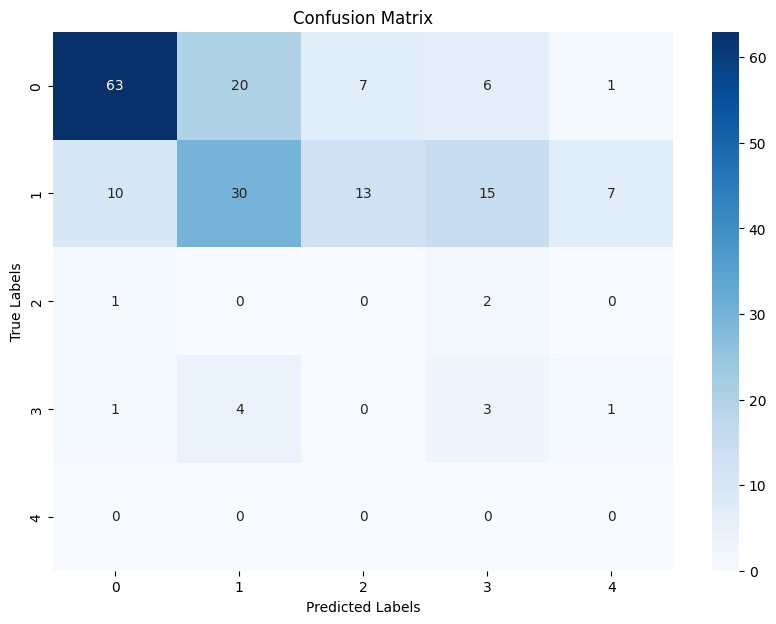

In [115]:
plt.figure(figsize=(10, 7))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()